# Norm of a vector

* Length or magnitude of a vector.
* Denoted by **l<sup>p</sup>**
* p can be any integer, even $\infty$

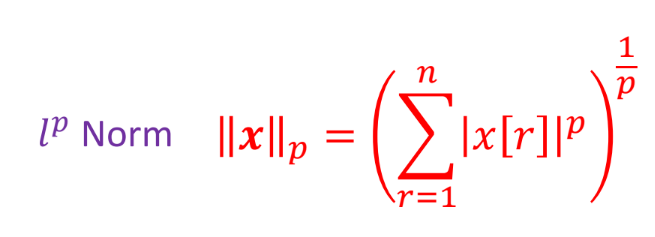

In [1]:
# Function to calculate p-norm
def norm(x, p=2):
    norm = 0
    for i in x:
        norm += i**p
    return norm**(1/p)

pnorm = lambda x, p: sum(x**p)**(1/p)

import numpy as np
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
# Calculate norm using Numpy: np.linalg.norm
print(np.linalg.norm(a))

16.881943016134134


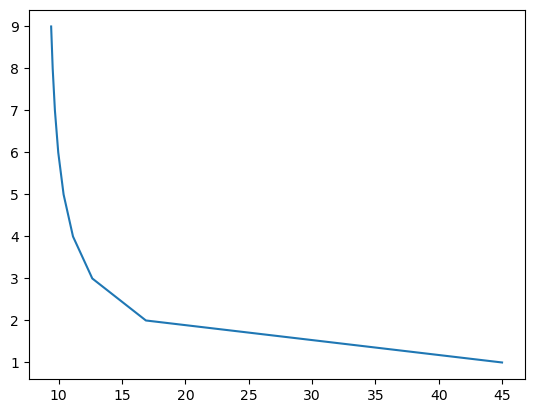

In [3]:
# Plot norm for different value of p
import matplotlib.pyplot as plt
plt.plot([pnorm(a, i) for i in range(1,10)], list(range(1,10)))
plt.show()

In [4]:
# Infinity norm??

# Distance
d: V x V => [0,$\infty$)<br>

d(x,y) must satisify the following for x, y ∈ V:
* d(x,y) >= 0
* d(x,y) = d(y,x)
* d(x,y) = 0 => x=y
* d(x,y) <= d(x,z) + d(z,y)

In [5]:
# Difference due to using different norm function for calculating distances
x = np.arange(1,6)
y = np.array([2,10,8,2,1])
print(pnorm(x-y, 2))

10.488088481701515


## Weighted Distance

In [6]:
# When to use?

In [7]:
# How to calculate?
wdist = lambda x, y, s: (x-y).T@s@(x-y)

# Matix multiplication with vector

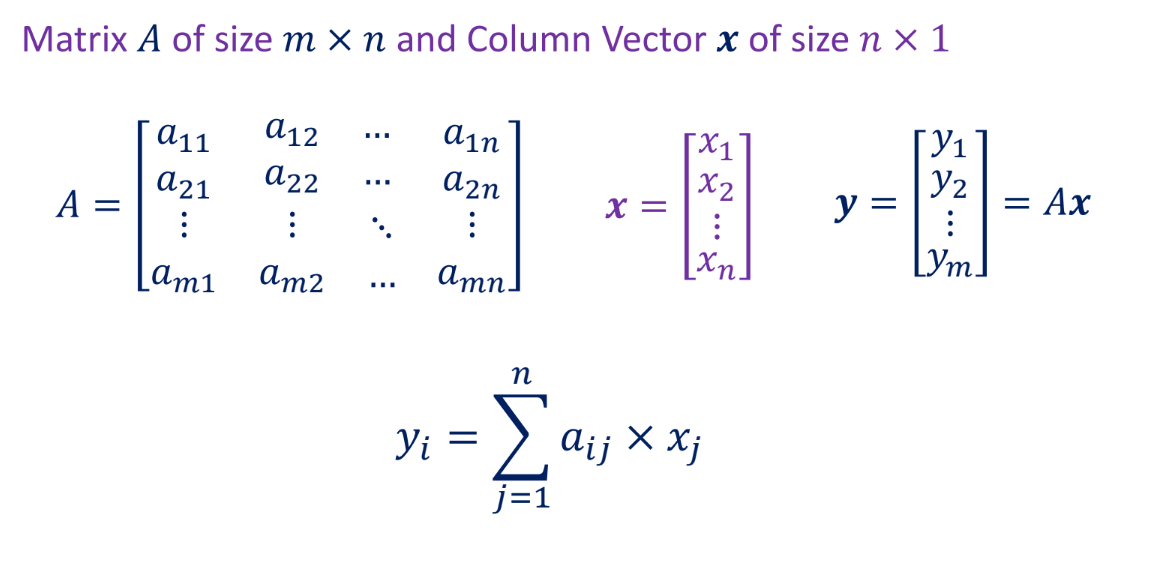

## Solving equations

Ax = B <br>
**x = A<sup>-1</sup>B**

In [8]:
# Creating function to solve equations
#  x+y = 100  
#  x-y = 20   
A = np.array([[1,40, 100], [1,-1, 0], [19, 8, 1]])
B = np.array([100,20, 10])
def solve_eq(A, B):
    return np.linalg.inv(A)@B
print(solve_eq(A,B))

[  6.05490786 -13.94509214   6.51748778]


In [9]:
# Using numpy to solve equations
np.linalg.solve(A,B)

array([  6.05490786, -13.94509214,   6.51748778])

# Determinant

In [10]:
# Using numpy
a = np.array([[1,2,0], [2,-1,4], [5,3,0]])
print(a)
print(np.linalg.det(a))

[[ 1  2  0]
 [ 2 -1  4]
 [ 5  3  0]]
27.999999999999996


In [11]:
print(np.delete(a, 2, 0))

[[ 1  2  0]
 [ 2 -1  4]]


In [12]:
# Using rescursion

def det(a):
    if a.size == 1:
        return a[0]
    res = 0
    for idx in range(len(a)):
        dummy = np.delete(np.delete(a, 0, 0), idx, 1)
        res += ((-1)**(idx))*a[0, idx]*det(dummy)
    return res
print(det(a))

[28]


# Eigen values and Eigen Vectors

Eigen vector of a matrix A is a vector represented by a matrix X such that when X is multiplied with matrix A, then the direction of the resultant matrix remains same as vector X. <br><br>
Mathematically, above statement can be represented as:<br>
**AX = λX**
<br>
where A is any arbitrary matrix, λ are eigen values and X is an eigen vector corresponding to each eigen value.<br>

### How to find eigen value and vectors?

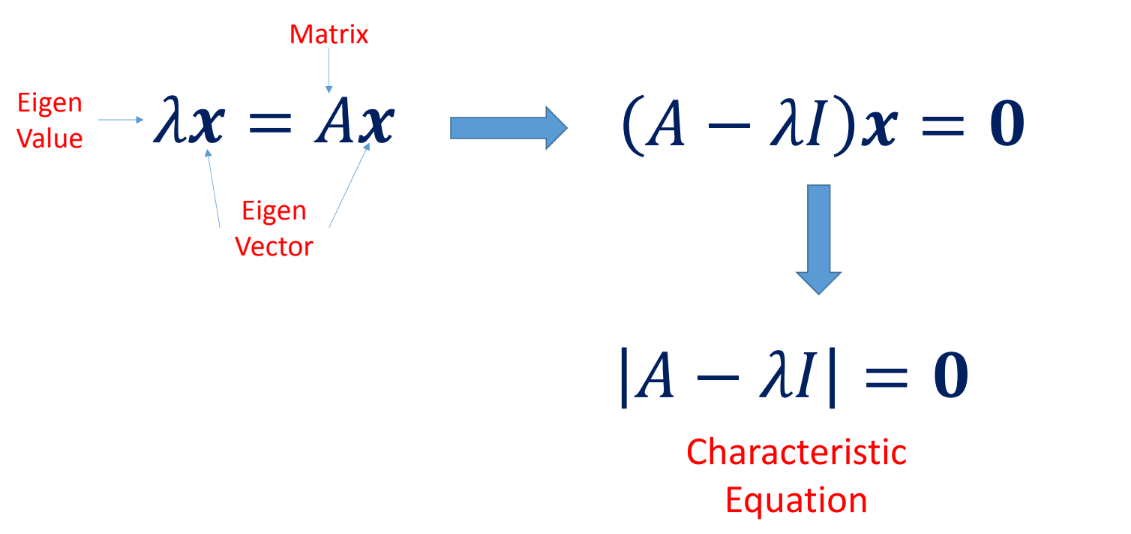

The roots of the characteristic equation are the eigen values of the matrix A.<br>

Now, to find the eigen vectors, we simply use each eigen value and get corresponding eigen vector.

**We only deal with symmetric matrices**

### Few properties:
* If λ1, λ2…….λn are the eigen values of A, then kλ1, kλ2…….kλn are eigen values of kA

* If λ1, λ2…….λn are the eigen values of A, then 1/λ1, 1/λ2…….1/λn are eigen values of A<sup>-1</sup>

* If λ1, λ2…….λn are the eigen values of A, then λ1k, λ2k…….λnk are eigen values of A<sup>k</sup>

* Eigen values of A = Eigen Values of AT (Transpose)

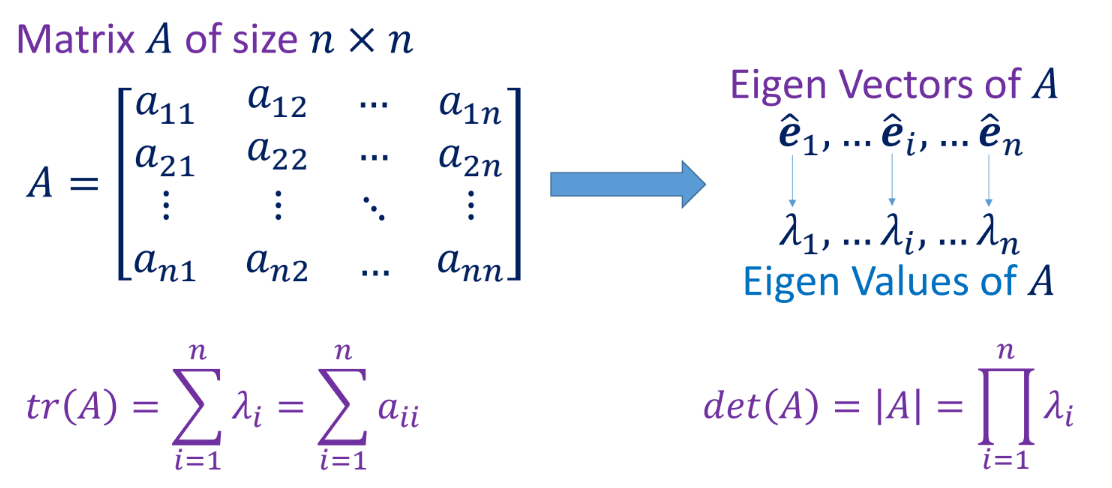

In [13]:
# Calculate using numpy
a = np.random.randint(10,100, (4,4))
print(a)
a = a + a.T
print(a)
val, vec= np.linalg.eig(a)
print("*"*10)
print(val)
print(vec)

[[54 35 39 83]
 [74 62 39 66]
 [58 93 57 90]
 [74 21 15 92]]
[[108 109  97 157]
 [109 124 132  87]
 [ 97 132 114 105]
 [157  87 105 184]]
**********
[478.86687367  86.68513684 -30.93335353  -4.61865698]
[[ 0.49781546  0.21631467  0.6602432  -0.51910177]
 [ 0.46437823 -0.5828656  -0.50317403 -0.43753452]
 [ 0.46355503 -0.44064271  0.33777994  0.69054721]
 [ 0.5671414   0.64754124 -0.44362094  0.24948234]]


## Matrix Diagonalization

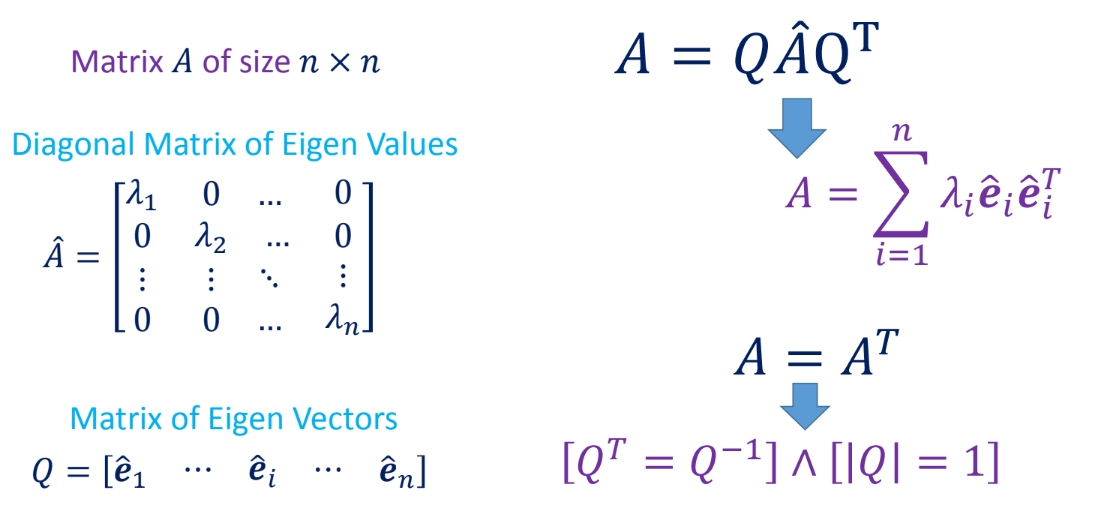

In [14]:
print("a: \n",a)
print("vectors: ",vec)
print("values: ",val)

a: 
 [[108 109  97 157]
 [109 124 132  87]
 [ 97 132 114 105]
 [157  87 105 184]]
vectors:  [[ 0.49781546  0.21631467  0.6602432  -0.51910177]
 [ 0.46437823 -0.5828656  -0.50317403 -0.43753452]
 [ 0.46355503 -0.44064271  0.33777994  0.69054721]
 [ 0.5671414   0.64754124 -0.44362094  0.24948234]]
values:  [478.86687367  86.68513684 -30.93335353  -4.61865698]


In [15]:
Q = vec
Ac = np.diag(val) #np.eye()
print(Ac)

[[478.86687367   0.           0.           0.        ]
 [  0.          86.68513684   0.           0.        ]
 [  0.           0.         -30.93335353   0.        ]
 [  0.           0.           0.          -4.61865698]]


In [16]:
Ab = Q@Ac@(Q.T)

In [17]:
print(Ab-a)

[[-1.42108547e-14 -4.26325641e-14 -2.84217094e-14 -1.13686838e-13]
 [-4.26325641e-14  1.42108547e-14 -5.68434189e-14 -1.27897692e-13]
 [-2.84217094e-14 -5.68434189e-14 -7.10542736e-14 -1.70530257e-13]
 [-1.13686838e-13 -1.27897692e-13 -1.84741111e-13 -2.27373675e-13]]
